In [1]:
import numpy as np
from matplotlib import pylab as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

In [2]:
PATH =  'ex1data1.txt'

In [3]:
df = pd.read_csv(PATH, header=None, names=['Population', 'Profit'])

In [4]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(df.Population.values, df.Population.values)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (72,)
X_test: (25,)


In [7]:
X_scaler = StandardScaler()
Y_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train.reshape(-1, 1))
Y_train = Y_scaler.fit_transform(Y_train.reshape(-1, 1))
X_test = X_scaler.transform(X_test.reshape(-1, 1))
Y_test = Y_scaler.transform(Y_test.reshape(-1, 1))

In [8]:
regressor1 = SGDRegressor(verbose=1, max_iter=100)

In [9]:
regressor1.fit(X_train, Y_train)

-- Epoch 1
Norm: 0.29, NNZs: 1, Bias: 0.003524, T: 72, Avg. loss: 0.356632
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.43, NNZs: 1, Bias: 0.003077, T: 144, Avg. loss: 0.208185
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.53, NNZs: 1, Bias: 0.002506, T: 216, Avg. loss: 0.136251
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.61, NNZs: 1, Bias: 0.002250, T: 288, Avg. loss: 0.092988
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.67, NNZs: 1, Bias: 0.001899, T: 360, Avg. loss: 0.065207
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.72, NNZs: 1, Bias: 0.001712, T: 432, Avg. loss: 0.046702
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.76, NNZs: 1, Bias: 0.001541, T: 504, Avg. loss: 0.033945
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.79, NNZs: 1, Bias: 0.001361, T: 576, Avg. loss: 0.024961
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.82, NNZs: 1, Bias: 0.001196, T: 648, Avg. loss: 0.018563
Total training time: 0.00 seconds.
--

/Users/zytec/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=100, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=1,
       warm_start=False)

In [10]:
regressor1.score(X_test, Y_test)

0.999999980884645

In [27]:
scores = cross_val_score(regressor1, X_train, Y_train, cv=5, scoring=metrics.make_scorer(metrics.mean_squared_error))

-- Epoch 1
Norm: 0.22, NNZs: 1, Bias: -0.012219, T: 57, Avg. loss: 0.371332
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 1, Bias: -0.019221, T: 114, Avg. loss: 0.243386
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.44, NNZs: 1, Bias: -0.022994, T: 171, Avg. loss: 0.174801
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.51, NNZs: 1, Bias: -0.024901, T: 228, Avg. loss: 0.129672
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 1, Bias: -0.025787, T: 285, Avg. loss: 0.098328
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.62, NNZs: 1, Bias: -0.026073, T: 342, Avg. loss: 0.075744
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.67, NNZs: 1, Bias: -0.025868, T: 399, Avg. loss: 0.059062
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.70, NNZs: 1, Bias: -0.025420, T: 456, Avg. loss: 0.046514
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.74, NNZs: 1, Bias: -0.024760, T: 513, Avg. loss: 0.036930
Total training time: 0.00 se

/Users/zytec/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zytec/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zytec/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zytec/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [28]:
scores

array([2.95087206e-07, 8.45050890e-09, 5.95250211e-07, 2.20610707e-08,
       5.91284536e-07])

In [13]:
predict_train = regressor1.predict(X_train)

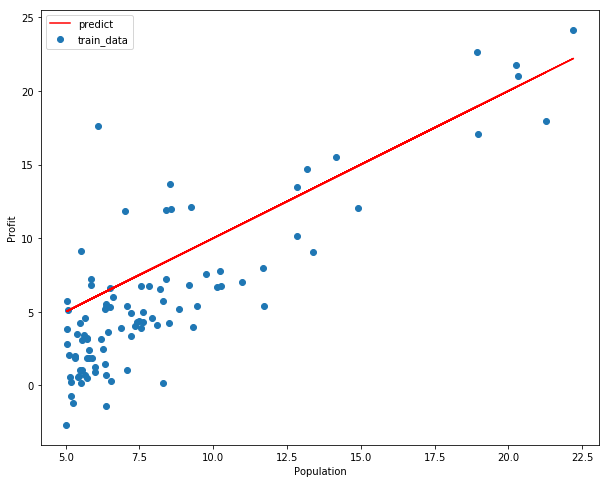

In [23]:
plt.figure(figsize=(10, 8))
plt.scatter(df.Population, df.Profit, label='train_data')
plt.plot(X_scaler.inverse_transform(X_train), Y_scaler.inverse_transform(predict_train), c='r', label='predict')
plt.legend()
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

In [15]:
predicts_test = regressor1.predict(X_test)

In [16]:
metrics.mean_squared_error(Y_test, predicts_test)

7.0003171460008795e-09